# 3. Bakery Transaction - Regression

Î≤†Ïù¥Ïª§Î¶¨ ÌåêÎß§ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïô∏Î∂Ä Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ ÌåêÎß§ ÏöîÏù∏ÏùÑ Ï∞æÍ≥† ÌåêÎß§Îüâ ÏòàÏ∏°ÌïòÍ∏∞<br>
Edinburgh, Scotland Î≤†Ïù¥Ïª§Î¶¨Ïùò ÌåêÎß§ Îç∞Ïù¥ÌÑ∞ [Kaggle - Transaction from a bakery](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery)<br>
Edinburgh, ScotlandÏùò Ïù¥Î≤§Ìä∏ Îç∞Ïù¥ÌÑ∞ [Local Events of Edinburg](https://edinburghguide.com/events)

<br>

**Î∂ÑÏÑù Î™©Ìëú**
- Î≤†Ïù¥Ïª§Î¶¨ ÌåêÎß§Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏ Ï∞æÍ∏∞
- Î≤†Ïù¥Ïª§Î¶¨ ÌåêÎß§Îüâ ÏòàÏ∏°ÌïòÍ∏∞
- ÏÑ∏Ìä∏ ÏÉÅÌíàÏúºÎ°ú Ï∂úÏãúÌïòÎ©¥ Ï¢ãÏùÑ Ï°∞Ìï© Ï†úÏïàÌïòÍ∏∞

<br>

---

<br>

[3. Analysis](##3.-Analysis) <br>
„ÄÄ[3-2. Regression](###3-1.-Regression)<br>

## 3. Analysis

**ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞**

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d

from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### 3-1. Regression

- ÎèÖÎ¶ΩÎ≥ÄÏàò: Day_of_Week ÏöîÏùº, holiday Í≥µÌú¥Ïùº Ïó¨Î∂Ä, event_day Ïù¥Î≤§Ìä∏ Ïó¨Î∂Ä
- Ï¢ÖÏÜçÎ≥ÄÏàò: Item ÌåêÎß§Îüâ

EDA Í≥ºÏ†ïÏóêÏÑú ÎßåÎì§Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©

In [2]:
new_bakery = pd.read_pickle('../input/new-bakery/new_bakery.pkl')

In [3]:
new_bakery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20507 non-null  object        
 1   Time         20507 non-null  object        
 2   Transaction  20507 non-null  int64         
 3   Item         20507 non-null  object        
 4   Date_Time    20507 non-null  datetime64[ns]
 5   Day_of_Week  20507 non-null  object        
 6   Month        20507 non-null  int64         
 7   Year         20507 non-null  int64         
 8   Hour         20507 non-null  int64         
 9   Session      20506 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 1.7+ MB


In [4]:
new_bakery.head()

Date      Time  Transaction           Item           Date_Time  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

  Day_of_Week  Month  Year  Hour  Session  
0      Sunday     10  2016     9  Morning  
1      Sunday     10  2016    10  Morning  
2      Sunday     10  2016    10  Morning  
3      Sunday     10  2016    10  Morning  
4      Sunday     10  2016    10  Morning

**Í≥µÌú¥ÏùºÍ≥º Î°úÏª¨ Ïù¥Î≤§Ìä∏ ÎÇ†Ïóê ÎåÄÌïú Ïª¨Îüº Ï∂îÍ∞Ä**

ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞: Ï†úÌíà, ÎÇ†Ïßú + Í≥µÌú¥Ïùº, Ïù¥Î≤§Ìä∏ Ï†ïÎ≥¥

- Edinburgh, Scotland ÏßÄÏó≠Ïùò Í≥µÌú¥Ïùº: 2016-12-25, 2016-12-26, 2017-01-01, 2017-01-02
- Edinburgh, Scotland ÏßÄÏó≠Ïùò Ïù¥Î≤§Ìä∏: 2016-11-05, 2016-11-12, 2017-01-28, 2017-02-04, 2017-02-18, 2017-03-04

In [5]:
holiday = ['2016-12-25','2016-12-26','2017-01-01','2017-01-02']
event_day = ['2016-11-05','2016-11-12','2017-01-28','2017-02-04','2017-02-18','2017-03-04']

In [6]:
dates = pd.DatetimeIndex(new_bakery['Date_Time'])
bakery = pd.DataFrame(new_bakery.Item.values, columns=['Item'], index = dates)
bakery.head()

Item
Date_Time                         
2016-10-30 09:58:11          Bread
2016-10-30 10:05:34   Scandinavian
2016-10-30 10:05:34   Scandinavian
2016-10-30 10:07:57  Hot chocolate
2016-10-30 10:07:57            Jam

**Ïùº Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ**

Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥Ïùò Ìé∏ÏùòÏÑ±ÏùÑ ÏúÑÌï¥ ÎÇ†ÏßúÎ•º Ïù∏Îç±Ïä§Î°ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïúÎã§

In [7]:
bakery_daily = bakery.resample('D').count()
bakery_daily.head()

Item
Date_Time       
2016-10-30   170
2016-10-31   199
2016-11-01   150
2016-11-02   164
2016-11-03   189

Í≥µÌú¥ÏùºÏù¥ bakery_dailyÏóê ÏûàÎã§Î©¥ 1, ÏóÜÎã§Î©¥ 0ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎäî Ïó¥ Ï∂îÍ∞ÄÌïòÍ∏∞

Ïù¥Î≤§Ìä∏Í∞Ä bakery_dailyÏóê ÏûàÎã§Î©¥ 1, ÏóÜÎã§Î©¥ 0ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎäî Ïó¥ Ï∂îÍ∞ÄÌïòÍ∏∞

In [8]:
bakery_daily['event_day'] = np.where(bakery_daily.index.isin(event_day),1, 0)
bakery_daily['holiday'] = np.where(bakery_daily.index.isin(holiday),1, 0)
bakery_daily.head()

Item  event_day  holiday
Date_Time                           
2016-10-30   170          0        0
2016-10-31   199          0        0
2016-11-01   150          0        0
2016-11-02   164          0        0
2016-11-03   189          0        0

<AxesSubplot:>

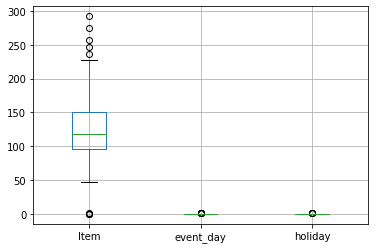

In [9]:
bakery_daily.boxplot()

In [10]:
bakery_daily.describe()

Item   event_day     holiday
count  162.000000  162.000000  162.000000
mean   126.586420    0.037037    0.024691
std     47.903065    0.189438    0.155664
min      0.000000    0.000000    0.000000
25%     95.750000    0.000000    0.000000
50%    118.000000    0.000000    0.000000
75%    150.750000    0.000000    0.000000
max    292.000000    1.000000    1.000000

Í≥µÌú¥ÏùºÏóê ÌåêÎß§Í∞Ä ÏùºÏñ¥ÎÇ¨ÎäîÎç∞ Ïù¥Îäî ÌäπÏù¥Ìïú Í≤ΩÏö∞ÎùºÍ≥† Î≥º Ïàò ÏûàÏúºÎØÄÎ°ú Î™®Îç∏ÎßÅÏùò Ï†ïÌôïÏÑ±ÏùÑ ÏúÑÌï¥ Ï†úÍ±∞ÌïòÏó¨ Î∂ÑÏÑùÌïúÎã§

In [11]:
bakery_daily[bakery_daily['holiday'] == 1]['Item']

Date_Time
2016-12-25    0
2016-12-26    0
2017-01-01    1
2017-01-02    0
Name: Item, dtype: int64

In [12]:
bakery_daily.loc[bakery_daily['Item'] == 1, 'Item'] = 0

<AxesSubplot:>

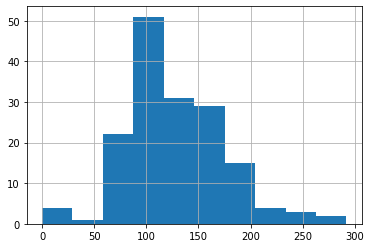

In [13]:
bakery_daily['Item'].hist()

**ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (STL Decompose)**

ÏãúÍ≥ÑÏó¥Ï†ÅÏù∏ ÌäπÏÑ±ÏùÑ Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Î•º trend, seasonal, residualÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑùÌïúÎã§.

bakery_dailyÏùò ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑÎ•º Î≥¥Î©¥ Ï∂îÏÑ∏Í∞Ä Î™ÖÌôïÌïòÏßÄÎäî ÏïäÏßÄÎßå ÏòàÏ∏° Í∞ÄÎä•Ìïú Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Îî∞ÎùºÏÑú, origin = trend + seasonal + residual Î°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑùÌïú Î™®Îç∏Ïù∏ additive Î™®Îç∏ÏùÑ Í∞ÄÏ†ïÌïòÍ≥† seasonal Í≥ÑÏ†àÏÑ±ÏùÑ ÏóÜÏï†Ï§ÄÎã§

<AxesSubplot:xlabel='Date_Time'>

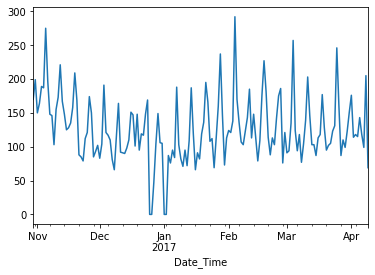

In [14]:
bakery_daily.Item.plot()

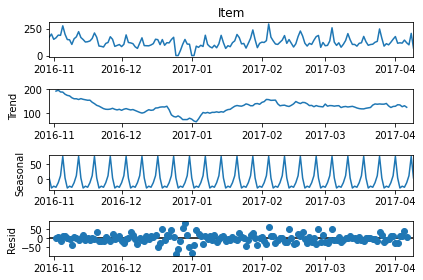

In [15]:
decomposition = sm.tsa.seasonal_decompose(bakery_daily['Item'], model="additive")
ax=decomposition.plot()
plt.show()

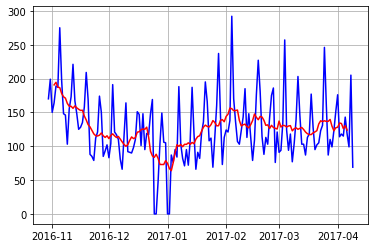

In [16]:
fig, ax = plt.subplots()
ax.grid(True)

plt.plot(bakery_daily.index, bakery_daily['Item'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Îê† Ïàò ÏûàÎäî ÎÇ†ÏßúÏôÄ ÏöîÏùº ÏöîÏù∏ÏùÑ Ïª¨ÎüºÏúºÎ°ú ÎÑ£Ïñ¥Ï§ÄÎã§. Ïù¥ Îïå ÏöîÏùºÏùÄ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÏó¨ Ï†ÅÏö©ÌïúÎã§.

In [17]:
bakery_daily['Date'] = bakery_daily.index
bakery_daily['Week_Day'] = bakery_daily.Date.dt.day_name()

In [18]:
bakery_data = pd.get_dummies(bakery_daily)
bakery_data.head()

Item  event_day  holiday       Date  Week_Day_Friday  \
Date_Time                                                          
2016-10-30   170          0        0 2016-10-30                0   
2016-10-31   199          0        0 2016-10-31                0   
2016-11-01   150          0        0 2016-11-01                0   
2016-11-02   164          0        0 2016-11-02                0   
2016-11-03   189          0        0 2016-11-03                0   

            Week_Day_Monday  Week_Day_Saturday  Week_Day_Sunday  \
Date_Time                                                         
2016-10-30                0                  0                1   
2016-10-31                1                  0                0   
2016-11-01                0                  0                0   
2016-11-02                0                  0                0   
2016-11-03                0                  0                0   

            Week_Day_Thursday  Week_Day_Tuesday  Week_Day_Wednesday  
Date_Time                                                            
2016-10-30                  0                 0                   0  
2016-10-31                  0                 0                   0  
2016-11-01                  0                 1                   0  
2016-11-02                  0                 0                   1  
2016-11-03                  1                 0                   0

**ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏**

ÏÉÅÍ¥Ä ÌñâÎ†¨Í≥º heatmapÏóêÏÑú 0.5Í∞Ä ÎÑòÏñ¥Í∞ÄÎäî Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎπàÎ≤àÌïòÏßÄ ÏïäÏùÄ Ìé∏Ïù¥ÎØÄÎ°ú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïùò Í∞ÄÎä•ÏÑ±ÏùÄ ÎÇÆÎã§Í≥† Î≥º Ïàò ÏûàÎã§. ÎòêÌïú, Î∂ÑÏÇ∞ÌåΩÏ∞ΩÏöîÏù∏ VIFÏù¥ 10Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïùò Í∞ÄÎä•ÏÑ±ÏùÄ ÎÇÆÎã§.

In [26]:
bakery_data.corr()

Item  event_day   holiday  Week_Day_Friday  \
Item                1.000000   0.512835 -0.421600         0.078729   
event_day           0.512835   1.000000 -0.031204        -0.079776   
holiday            -0.421600  -0.031204  1.000000        -0.064723   
Week_Day_Friday     0.078729  -0.079776 -0.064723         1.000000   
Week_Day_Monday    -0.217448  -0.079776  0.163214        -0.165468   
Week_Day_Saturday   0.627027   0.482122 -0.064723        -0.165468   
Week_Day_Sunday     0.020396  -0.081786  0.157591        -0.169638   
Week_Day_Thursday  -0.098237  -0.079776 -0.064723        -0.165468   
Week_Day_Tuesday   -0.192273  -0.079776 -0.064723        -0.165468   
Week_Day_Wednesday -0.218559  -0.079776 -0.064723        -0.165468   

                    Week_Day_Monday  Week_Day_Saturday  Week_Day_Sunday  \
Item                      -0.217448           0.627027         0.020396   
event_day                 -0.079776           0.482122        -0.081786   
holiday                    0.163214          -0.064723         0.157591   
Week_Day_Friday           -0.165468          -0.165468        -0.169638   
Week_Day_Monday            1.000000          -0.165468        -0.169638   
Week_Day_Saturday         -0.165468           1.000000        -0.169638   
Week_Day_Sunday           -0.169638          -0.169638         1.000000   
Week_Day_Thursday         -0.165468          -0.165468        -0.169638   
Week_Day_Tuesday          -0.165468          -0.165468        -0.169638   
Week_Day_Wednesday        -0.165468          -0.165468        -0.169638   

                    Week_Day_Thursday  Week_Day_Tuesday  Week_Day_Wednesday  
Item                        -0.098237         -0.192273           -0.218559  
event_day                   -0.079776         -0.079776           -0.079776  
holiday                     -0.064723         -0.064723           -0.064723  
Week_Day_Friday             -0.165468         -0.165468           -0.165468  
Week_Day_Monday             -0.165468         -0.165468           -0.165468  
Week_Day_Saturday           -0.165468         -0.165468           -0.165468  
Week_Day_Sunday             -0.169638         -0.169638           -0.169638  
Week_Day_Thursday            1.000000         -0.165468           -0.165468  
Week_Day_Tuesday            -0.165468          1.000000           -0.165468  
Week_Day_Wednesday          -0.165468         -0.165468            1.000000

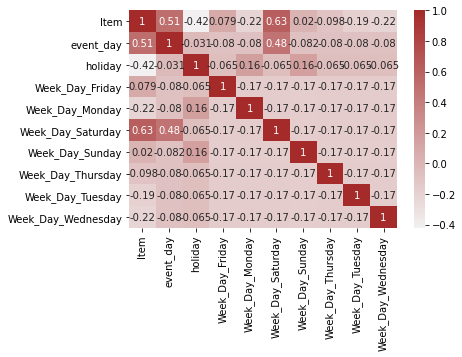

In [25]:
import seaborn as sns                        

cmap = sns.light_palette("brown", as_cmap = True)  
sns.heatmap(bakery_data.corr(), annot = True, cmap = cmap)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(bakery_data.values, i) for i in range(bakery_data.shape[1])]
vif["features"] = bakery_data.columns
vif

VIF Factor            features
0    3.112084                Item
1    1.536965           event_day
2    1.584814             holiday
3    4.571879     Week_Day_Friday
4    3.474981     Week_Day_Monday
5    7.774411   Week_Day_Saturday
6    4.970888     Week_Day_Sunday
7    3.562444   Week_Day_Thursday
8    3.094098    Week_Day_Tuesday
9    2.971628  Week_Day_Wednesday

**Train dataÏôÄ Test data ÎÇòÎàÑÍ∏∞**

In [23]:
X = bakery_data[bakery_data.columns.difference(['Item'])]
y = bakery_data['Item']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

129 33
129 33


**Î™®Îç∏ Ï†ÅÌï© - Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä LinearRegression**

**Î™®Îç∏ ÌäúÎãù**

Ï†àÌé∏Ïùò Ïó¨Î∂ÄÏôÄ Ï†ïÍ∑úÌôîÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌï¥ÏïºÌïòÎäîÎç∞ Í∞ÄÎä•Ìïú Î™®Îç∏Ïùò Í≤ΩÏö∞Î•º Î™®Îëê Íµ¨Ìï¥ÏÑú Î™®Îç∏ fit Í≤∞Í≥ºÎ•º ÏïåÎ†§Ï£ºÍ≥† Í∞ÄÏû• Ï†ÅÌï©Ìïú Í≤ΩÏö∞Î•º ÏïåÎ†§Ï§ÄÎã§.

Ïù¥Î•º ÌÜ†ÎåÄÎ°ú Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÌïúÎã§.

ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Îä•ÏùÄ scoring Îß§Í∞úÎ≥ÄÏàòÏóê ÎπÑÏö©Ìï®ÏàòÍ∞Ä ÏïÑÎãàÎùº Ìö®Ïö©Ìï®ÏàòÎ•º Í∏∞ÎåÄÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ï¶â Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ï¢ãÏùÄ Í≤ΩÏö∞Î°ú ÌåêÎã®ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÌèâÍ∑† Ï†úÍ≥±Ïò§Ï∞® (MSE)Ïùò ÏùåÏàòÍ∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

**üí´ invalid type promotion ÏóêÎü¨Í∞Ä Î∞úÏÉùÌïòÎäî Ïù¥Ïú†**

Ïó∞-Ïõî-Ïùº ÌòïÌÉúÏùò datetime64[ns]Í∞Ä Ìè¨Ìï®ÎêòÏóàÍ∏∞ ÎïåÎ¨∏ ‚Üí Date Ìï≠Î™©ÏùÄ Ïù∏Îç±Ïä§Î°ú Îì§Ïñ¥Í∞Ä ÏûàÏúºÎØÄÎ°ú Date Ïª¨ÎüºÏùÑ Ï†úÍ±∞Ìï¥Ï§ÄÎã§.

In [22]:
bakery_data = bakery_data.drop(['Date'], axis=1)
bakery_data

Item  event_day  holiday  Week_Day_Friday  Week_Day_Monday  \
Date_Time                                                                
2016-10-30   170          0        0                0                0   
2016-10-31   199          0        0                0                1   
2016-11-01   150          0        0                0                0   
2016-11-02   164          0        0                0                0   
2016-11-03   189          0        0                0                0   
...          ...        ...      ...              ...              ...   
2017-04-05   143          0        0                0                0   
2017-04-06   118          0        0                0                0   
2017-04-07    99          0        0                1                0   
2017-04-08   205          0        0                0                0   
2017-04-09    69          0        0                0                0   

            Week_Day_Saturday  Week_Day_Sunday  Week_Day_Thursday  \
Date_Time                                                           
2016-10-30                  0                1                  0   
2016-10-31                  0                0                  0   
2016-11-01                  0                0                  0   
2016-11-02                  0                0                  0   
2016-11-03                  0                0                  1   
...                       ...              ...                ...   
2017-04-05                  0                0                  0   
2017-04-06                  0                0                  1   
2017-04-07                  0                0                  0   
2017-04-08                  1                0                  0   
2017-04-09                  0                1                  0   

            Week_Day_Tuesday  Week_Day_Wednesday  
Date_Time                                         
2016-10-30                 0                   0  
2016-10-31                 0                   0  
2016-11-01                 1                   0  
2016-11-02                 0                   1  
2016-11-03                 0                   0  
...                      ...                 ...  
2017-04-05                 0                   1  
2017-04-06                 0                   0  
2017-04-07                 0                   0  
2017-04-08                 0                   0  
2017-04-09                 0                   0  

[162 rows x 10 columns]

In [41]:
# ÌååÎùºÎØ∏ÌÑ∞ Ïù¥Î¶ÑÏùÄ Ï†ïÏùòÎêú Ïù¥Î¶Ñ Í∑∏ÎåÄÎ°úÎ•º ÏÇ¨Ïö©Ìï¥ÏïºÌïúÎã§ 
parameter_cases = {
    'fit_intercept': [True, False],
    'normalize': [False, True]
}

lm = LinearRegression()

estimator = GridSearchCV(lm, param_grid = parameter_cases, 
                         scoring="neg_mean_squared_error", cv=3,
                         return_train_score=True, iid=True)

results = estimator.fit(X_train, y_train)
print(results.best_estimator_)

LinearRegression()


In [42]:
pd.DataFrame(results.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004411      0.000154         0.002488        0.000099   
1       0.004385      0.000503         0.002389        0.000049   
2       0.003558      0.000019         0.002454        0.000162   
3       0.003775      0.000089         0.002321        0.000075   

  param_fit_intercept param_normalize  \
0                True           False   
1                True            True   
2               False           False   
3               False            True   

                                         params  split0_test_score  \
0   {'fit_intercept': True, 'normalize': False}        -762.460354   
1    {'fit_intercept': True, 'normalize': True}        -762.460354   
2  {'fit_intercept': False, 'normalize': False}        -762.460354   
3   {'fit_intercept': False, 'normalize': True}        -762.460354   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0        -837.065086       -1114.861596      -904.795679      151.629447   
1        -899.813953       -1114.861596      -925.711968      145.028018   
2        -837.065086       -1114.861596      -904.795679      151.629447   
3        -837.065086       -1114.861596      -904.795679      151.629447   

   rank_test_score  split0_train_score  split1_train_score  \
0                1         -839.180022         -761.726767   
1                4         -839.180022         -776.604651   
2                2         -839.180022         -761.726767   
3                2         -839.180022         -761.726767   

   split2_train_score  mean_train_score  std_train_score  
0         -676.052619       -758.986469        66.624666  
1         -676.052619       -763.945764        67.195352  
2         -676.052619       -758.986469        66.624666  
3         -676.052619       -758.986469        66.624666

Train ScoreÎÇò Test ScoreÍ∞Ä Î™®Îì† Í≤ΩÏö∞Ïóê Í∞ôÍ∏∞ ÎïåÎ¨∏Ïóê ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î≥º Ïàò ÏóÜÎã§. fit_intercept=True, normalize = False Ïù∏ Î™®Îç∏Î°ú Ï†ÅÌï©ÏùÑ Ìï¥Î≥¥Ïûê.

In [43]:
lr = LinearRegression(fit_intercept=True, normalize = False)
lr.fit(X_train, y_train)
print(lr.intercept_, [z for z in zip(X.columns, lr.coef_)])

126.36527944511138 [('Week_Day_Friday', 8.468053888221942), ('Week_Day_Monday', -12.95723346809988), ('Week_Day_Saturday', 56.92043484060289), ('Week_Day_Sunday', 11.560007911210477), ('Week_Day_Thursday', -14.587501667333601), ('Week_Day_Tuesday', -24.920835000666912), ('Week_Day_Wednesday', -24.48292650393493), ('event_day', 60.11428571428571), ('holiday', -121.58045977011496)]


In [44]:
y_pred = lr.predict(X_train)
print(lr.coef_, np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

[   8.46805389  -12.95723347   56.92043484   11.56000791  -14.58750167
  -24.920835    -24.4829265    60.11428571 -121.58045977] 27.944753247941918


**Î™®Îç∏ Ï†ÅÌï© - Î¶øÏßÄ ÌöåÍ∑Ä Ridge Regression**

**Î™®Îç∏ ÌäúÎãù**

ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏïåÌååÏùò Î≤îÏúÑÎ•º logspace(-10,10, 20)Î°ú ÎëêÍ≥† Ridge Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† ÏµúÏ†ÅÏùò ÏïåÌåå Í∞íÏùÑ Ï∞æÏïÑÎ≥¥Ïûê.

In [47]:
grid = GridSearchCV(estimator=Ridge(),
                    param_grid = {'alpha': np.logspace(-10,10, 20)},
                    scoring="neg_mean_squared_error", cv=3,
                    return_train_score=True, iid=True)


grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(), iid=True,
             param_grid={'alpha': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
print(np.sqrt(-grid.best_score_), grid.best_params_)

30.079821784779085 {'alpha': 1e-10}


In [49]:
best_model = grid.best_estimator_
np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))

24.045317672416132

**Ï†ÅÌï© Í≤∞Í≥º ÌôïÏù∏**

In [50]:
ridge = Ridge(alpha=1e-10, normalize=False)
ridge.fit(X_train, y_train)
print(ridge.coef_, np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))))

[   8.46833333  -12.95695403   56.92071428   11.56028735  -14.58722223
  -24.92055556  -24.48264706   60.11428571 -121.58045977] 27.944753247941918


<AxesSubplot:title={'center':'Coefficient with Ridge'}>

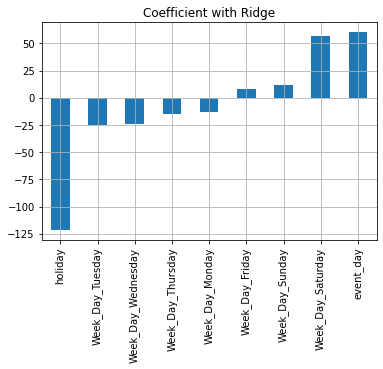

In [51]:
predictors = X_train.columns
coefRidge = Series(ridge.coef_, predictors).sort_values()
coefRidge.plot(kind='bar', title='Coefficient with Ridge', grid=True)

**Î™®Îç∏ Ï†ÅÌï© - ÎùºÏèò ÌöåÍ∑Ä Lasso Regression**

In [52]:
lasso = Lasso(normalize=False)
lasso.fit(X_train, y_train)

Lasso()

<AxesSubplot:title={'center':'Coefficient with Lasso'}>

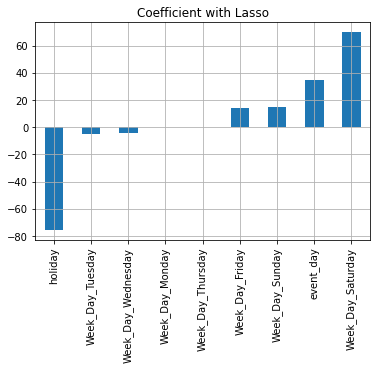

In [53]:
predictors = X_train.columns
coefLasso = Series(lasso.coef_, predictors).sort_values()
coefLasso.plot(kind='bar', title='Coefficient with Lasso', grid=True)

**Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê**

Îã§Ï§ëÏÑ†ÌòïÎ™®Îç∏Í≥º Ridge, Lasso Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÏùò RMSEÏôÄ scores (Í≤∞Ï†ïÍ≥ÑÏàò)Ïùò Í∞íÏúºÎ°ú ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥¥Ïûê.

In [54]:
fit_results = pd.DataFrame(columns=['Model', 'Train_RMSE', 'Test_RMSE', 'Train_Score','Test_Score'], index=range(3))
model_list = [lr, ridge, lasso]

y_pred_mean_train = [y_train.mean()] * len(y_train)
y_pred_mean_test = [y_test.mean()] * len(y_test)

for idx, model in enumerate(model_list):
    rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    fit_results.loc[idx] = [model, rmse_train, rmse_test, score_train, score_test]
    
fit_results.loc[3] = ['Baseline',  np.sqrt(metrics.mean_squared_error(y_train, y_pred_mean_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean_test)),0.0, 0.0]
    
fit_results

Model Train_RMSE  Test_RMSE Train_Score Test_Score
0  LinearRegression()  27.944753  24.045318    0.658291   0.745165
1  Ridge(alpha=1e-10)  27.944753  24.045318    0.658291   0.745165
2             Lasso()  29.738836  28.273159    0.613007   0.647672
3            Baseline  47.804886  47.632219         0.0        0.0

In [55]:
fit_results.index = fit_results.Model

<AxesSubplot:title={'center':'Score for test'}, ylabel='Model'>

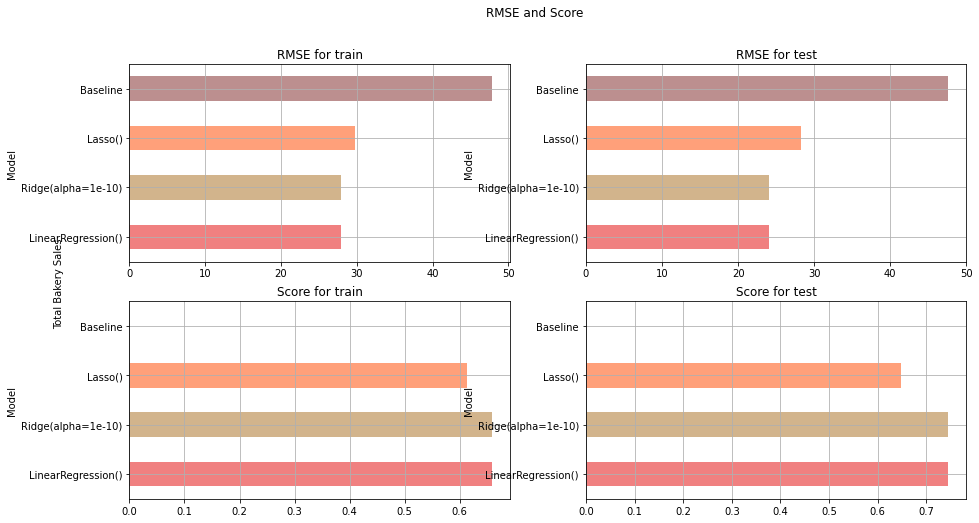

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15,8), sharex=False, sharey=False, squeeze=False)
fig.suptitle('RMSE and Score', fontsize=12)
fig.text(0.06, 0.5, 'Total Bakery Sales', ha='center', va='center', rotation='vertical')

RMSE_train_graph = fit_results['Train_RMSE']
RMSE_train_graph.plot(ax=axes[0][0], grid=True, kind='barh', title='RMSE for train', color=['lightcoral', 'tan', 'lightsalmon','rosybrown'])

RMSE_test_graph = fit_results['Test_RMSE']
RMSE_test_graph.plot(ax=axes[0][1], grid=True, kind='barh', title='RMSE for test', color=['lightcoral', 'tan', 'lightsalmon','rosybrown'])

score_train_graph = fit_results['Train_Score']
score_train_graph.plot(ax=axes[1][0], grid=True, kind='barh', title='Score for train', color=['lightcoral', 'tan', 'lightsalmon','rosybrown'])

score_test_graph = fit_results['Test_Score']
score_test_graph.plot(ax=axes[1][1], grid=True, kind='barh', title='Score for test', color=['lightcoral', 'tan', 'lightsalmon','rosybrown'])

In [57]:
results_pred_train = pd.DataFrame({'Actual': y_train, 
                                   'LR_Pred': lr.predict(X_train), 
                                   'Lasso_Pred': lasso.predict(X_train), 
                                   'Ridge_Pred': ridge.predict(X_train)}) 
results_pred_train.describe()

Actual     LR_Pred  Lasso_Pred  Ridge_Pred
count  129.000000  129.000000  129.000000  129.000000
mean   126.387597  126.387597  126.387597  126.387597
std     47.991261   38.937784   31.185471   38.937784
min      0.000000   -8.172414   37.965750   -8.172414
25%     95.000000  101.882353  109.470654  101.882353
50%    117.000000  113.408046  113.615118  113.408046
75%    151.000000  137.925287  128.717868  137.925287
max    275.000000  243.400000  217.599968  243.400000

<AxesSubplot:>

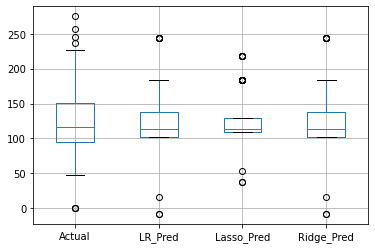

In [58]:
results_pred_train.boxplot()

<AxesSubplot:xlabel='Date_Time'>

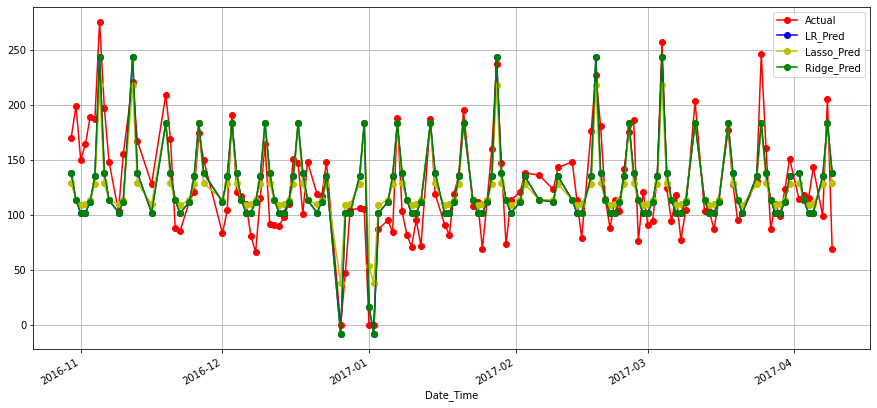

In [59]:
results_pred_train[['Actual', 'LR_Pred', 'Lasso_Pred', 'Ridge_Pred']].plot(figsize=(15,7), style={'Actual': '-or', 'LR_Pred': '-ob', 'Lasso_Pred': '-oy', 'Ridge_Pred': '-og'}, grid=True)

In [60]:
results_pred_train.sort_values(by=['Actual'])

Actual     LR_Pred  Lasso_Pred  Ridge_Pred
Date_Time                                             
2017-01-01       0   16.344828   53.068500   16.344828
2017-01-02       0   -8.172414   37.965750   -8.172414
2016-12-26       0   -8.172414   37.965750   -8.172414
2016-12-27      47  101.444444  108.610880  101.444444
2016-12-08      66  111.777778  113.615118  111.777778
...            ...         ...         ...         ...
2017-02-18     227  243.400000  217.599968  243.400000
2017-01-28     237  243.400000  217.599968  243.400000
2017-03-25     246  183.285714  183.283459  183.285714
2017-03-04     257  243.400000  217.599968  243.400000
2016-11-05     275  243.400000  217.599968  243.400000

[129 rows x 4 columns]

In [61]:
results_pred_test = pd.DataFrame({'Actual': y_test, 
                                  'LR_Pred': lr.predict(X_test)
                                  ,'Lasso_Pred': lasso.predict(X_test),
                                  'Ridge_Pred': ridge.predict(X_test)}) 
results_pred_test.describe()

Actual     LR_Pred  Lasso_Pred  Ridge_Pred
count   33.000000   33.000000   33.000000   33.000000
mean   127.333333  122.821186  123.712554  122.821186
std     48.370747   37.194328   29.476042   37.194328
min      0.000000   16.344828   53.068500   16.344828
25%    103.000000  101.882353  109.470654  101.882353
50%    123.000000  111.777778  113.615118  111.777778
75%    149.000000  134.833333  127.664940  134.833333
max    292.000000  243.400000  217.599968  243.400000

<AxesSubplot:>

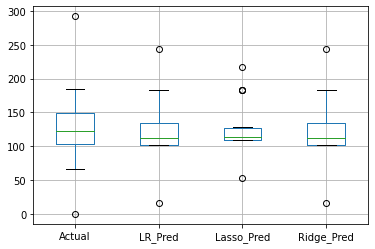

In [62]:
results_pred_test.boxplot()

<AxesSubplot:xlabel='Date_Time'>

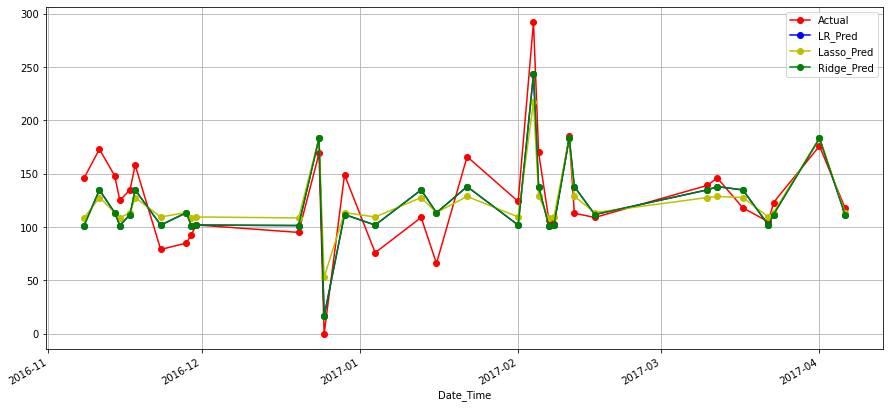

In [63]:
results_pred_test[['Actual', 'LR_Pred', 'Lasso_Pred', 'Ridge_Pred']].plot(figsize=(15,7), style={'Actual': '-or', 'LR_Pred': '-ob', 'Lasso_Pred': '-oy', 'Ridge_Pred': '-og'}, grid=True)

In [64]:
results_pred_test.sort_index()

Actual     LR_Pred  Lasso_Pred  Ridge_Pred
Date_Time                                             
2016-11-08     146  101.444444  108.610880  101.444444
2016-11-11     173  134.833333  127.664940  134.833333
2016-11-14     148  113.408046  113.615118  113.408046
2016-11-15     125  101.444444  108.610880  101.444444
2016-11-17     135  111.777778  113.615118  111.777778
2016-11-18     158  134.833333  127.664940  134.833333
2016-11-23      79  101.882353  109.470654  101.882353
2016-11-28      85  113.408046  113.615118  113.408046
2016-11-29      93  101.444444  108.610880  101.444444
2016-11-30     102  101.882353  109.470654  101.882353
2016-12-20      95  101.444444  108.610880  101.444444
2016-12-24     169  183.285714  183.283459  183.285714
2016-12-25       0   16.344828   53.068500   16.344828
2016-12-29     149  111.777778  113.615118  111.777778
2017-01-04      76  101.882353  109.470654  101.882353
2017-01-13     109  134.833333  127.664940  134.833333
2017-01-16      66  113.408046  113.615118  113.408046
2017-01-22     166  137.925287  128.717868  137.925287
2017-02-01     124  101.882353  109.470654  101.882353
2017-02-04     292  243.400000  217.599968  243.400000
2017-02-05     170  137.925287  128.717868  137.925287
2017-02-07     107  101.444444  108.610880  101.444444
2017-02-08     103  101.882353  109.470654  101.882353
2017-02-11     185  183.285714  183.283459  183.285714
2017-02-12     113  137.925287  128.717868  137.925287
2017-02-16     109  111.777778  113.615118  111.777778
2017-03-10     139  134.833333  127.664940  134.833333
2017-03-12     146  137.925287  128.717868  137.925287
2017-03-17     118  134.833333  127.664940  134.833333
2017-03-22     105  101.882353  109.470654  101.882353
2017-03-23     123  111.777778  113.615118  111.777778
2017-04-01     176  183.285714  183.283459  183.285714
2017-04-06     118  111.777778  113.615118  111.777778

---

### Conclusion of Regression 
<br>

- Î≤†Ïù¥Ïª§Î¶¨Ïùò ÏùºÏùº ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÄ Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïù¥Îã§.

```
Items = 8.46805389 Week_Day_Friday -12.95723347 Week_Day_Monday +  56.92043484 Week_Day_Saturday + 11.56000791 Week_Day_Sunday   + -14.58750167 Week_Day_Thursday  -24.920835 Week_Day_Tuesday  + -24.4829265 Week_Day_Wednesday  + 60.11428571 event_day  -121.58045977 holiday
```
<br>

- Îã§Îßå, Î≥ÄÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê Î≥ÄÏàò ÏÑ†ÌÉùÏù¥ÎÇò Î≥ÄÏàò Ï∂ïÏÜå Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ ÏòÅÌñ•Î†• ÎÜíÏùÄ Î≥ÄÏàòÎßåÏùÑ Ï∂îÎ†§ÎÇº ÌïÑÏöîÍ∞Ä ÏûàÎã§.
- ÏÑ§Î™ÖÎ†•ÏùÄ Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®ÌòïÍ≥º Ridge ÌöåÍ∑Ä Î™®ÌòïÏù¥ 0.745165Î°ú ÎÜíÏïòÍ≥† RMSE ÎòêÌïú  Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®ÌòïÍ≥º Ridge ÌöåÍ∑Ä Î™®ÌòïÏù¥ 24.045318Î°ú Í∞ÄÏû• ÎÇÆÏïòÎã§.
- Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®ÌòïÍ≥º Ridge ÌöåÍ∑Ä Î™®ÌòïÏùò ÌèâÍ∞ÄÏßÄÌëúÍ∞Ä Í∞ôÏùÄ Ïù¥Ïú†Îäî Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïóê Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïùò ÏòÅÌñ•Î†•Ïù¥ Îß§Ïö∞ ÎØ∏ÎØ∏ÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.
- ÏùºÏùº ÌåêÎß§ÎüâÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÎäî holiday Ï¶â, Í≥µÌú¥Ïùº Î≥ÄÏàòÏù¥Îã§.